In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo


In [3]:
#uniform distribution for all
hyper_parameter_bounds = hyp.define_hyperparameter_bounds(
    zred = np.array([0, 0, 7]),
    logtage = np.array([0, -3, 1]),
    logzsol = np.array([0, -2.5, 0.5]),
    dust1 = np.array([0, 0, 2]),
    dust2 = np.array([0, 0, 2]),
    igm_factor = np.array([0, 0, 2]),#np.array([2, 0, 2]),
    gas_logu = np.array([0, -4, -1]),
    fagn = np.array([0, 0, 10]),
    imf1 = np.array([0, 0.2, 2.6]), 
    imf2 = np.array([0, 1.0, 3.4]), 
    imf3 = np.array([0, 1.0, 3.4]), 
    logtau = np.array([0, -4, 1]),
    loga = np.array([0, -3, 3]),
    logb = np.array([0, -3, 3]),
    logmass = np.array([0, 7, 13])
)

hyperparameters = hyp.sample_hyper_parameters(hyper_parameter_bounds)
#hyp.plot_hyperparameters(10000, hyper_parameter_bounds, rows=7, nbins=20)


{0.4, 0.8, 2.0, 1.6, 1.2, 2.4} {1.2, 2.0, 2.4, 2.8, 1.6, 3.2} {1.2, 2.0, 2.4, 2.8, 1.6, 3.2}


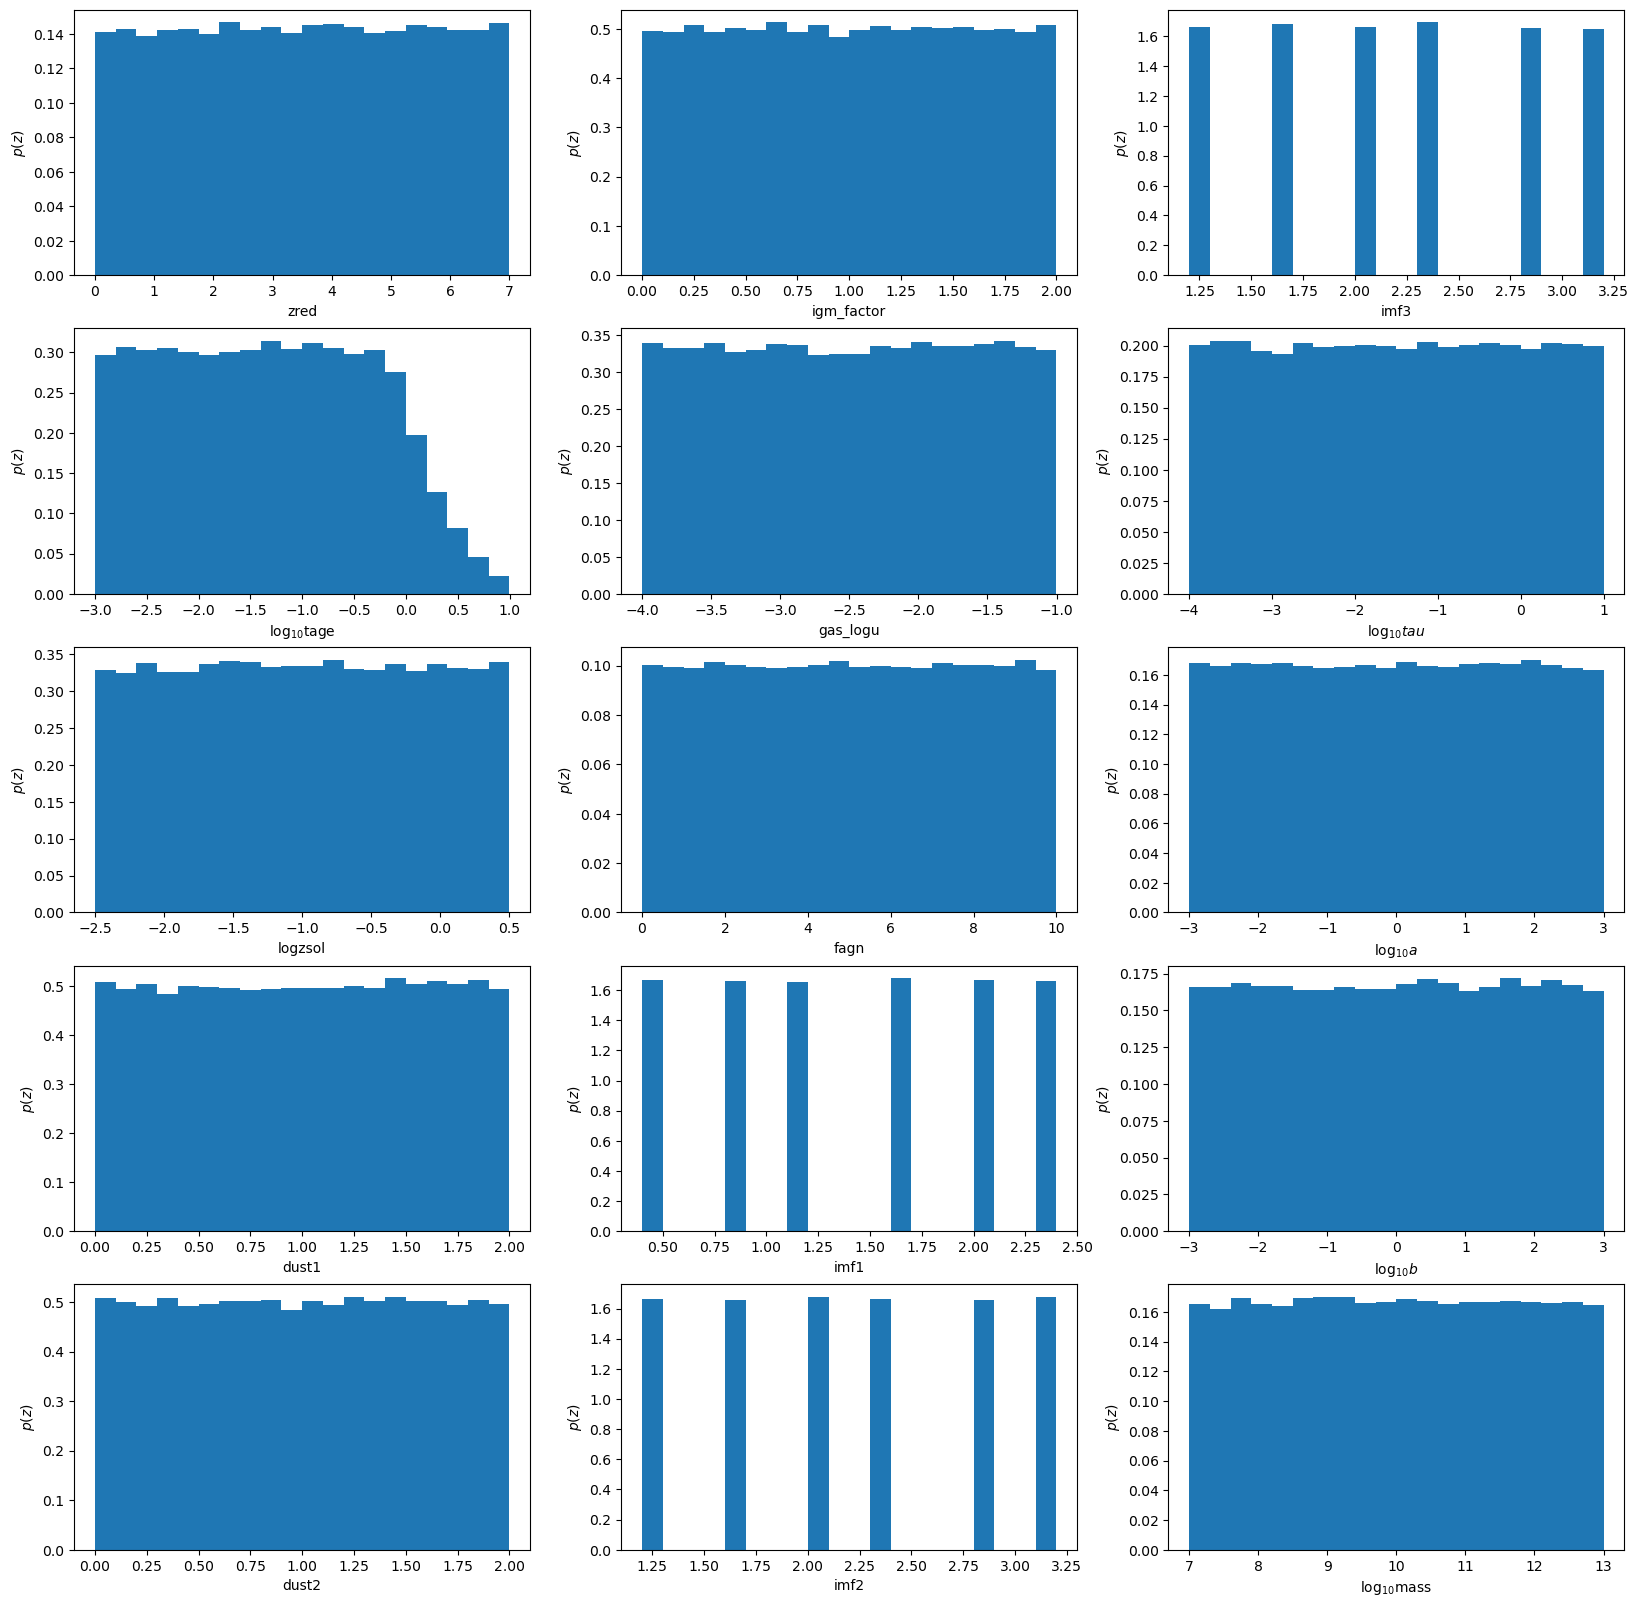

In [4]:
spsparams = tools.draw_sps_parameters(100000, hyperparameters)
tools.plot_galaxy_population(spsparams)
print(set(spsparams[:,8]), set(spsparams[:,9]), set(spsparams[:,10]))

In [5]:
data = tools.simulate_photometry(1, hyperparameters, dust_type=0, imf_type=2, zhistory=True, nebem=True, filters='all')

SPS Parameters Generated
Starting Run 1/3
libraries:  (b'mist', b'miles', b'DL07')
Run 1/3 Complete
Starting Run 2/3
Run 2/3 Complete
Starting Run 3/3
Run 3/3 Complete
Complete


Galaxy Age (Gyr): 0.016802899594458902
Age of the universe at given redshift (Gyr): 1.2116935096968136
Redshift: 4.928093261791168
Observed Metallicity (Absolute Metallicity): 0.03657706854478506


(array([4.49043428e-05, 4.49069772e-05, 4.49096435e-05, 4.49123421e-05,
        4.49150734e-05, 4.49178378e-05, 4.49206357e-05, 4.49234675e-05,
        4.49263337e-05, 4.49292345e-05, 4.49321705e-05, 4.49351421e-05,
        4.49381497e-05, 4.49411937e-05, 4.49442746e-05, 4.49473928e-05,
        4.49505488e-05, 4.49537431e-05, 4.49569760e-05, 4.49602482e-05,
        4.49635600e-05, 4.49669119e-05, 4.49703044e-05, 4.49737380e-05,
        4.49772133e-05, 4.49807306e-05, 4.49842906e-05, 4.49878937e-05,
        4.49915404e-05, 4.49952314e-05, 4.49989670e-05, 4.50027480e-05,
        4.50065747e-05, 4.50104478e-05, 4.50143679e-05, 4.50183354e-05,
        4.50223510e-05, 4.50264153e-05, 4.50305288e-05, 4.50346921e-05,
        4.50389059e-05, 4.50431708e-05, 4.50474873e-05, 4.50518562e-05,
        4.50562779e-05, 4.50607533e-05, 4.50652829e-05, 4.50698673e-05,
        4.50745073e-05, 4.50792036e-05, 4.50839567e-05, 4.50887674e-05,
        4.50936365e-05, 4.50985645e-05, 4.51035522e-05, 4.510860

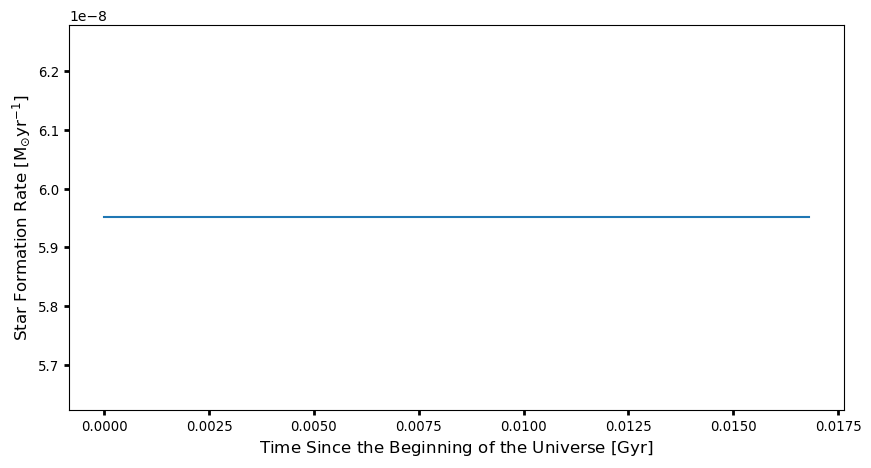

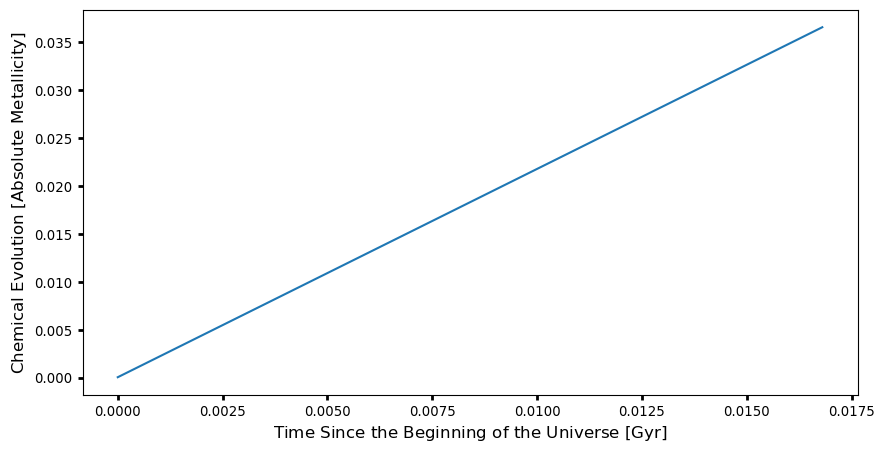

In [6]:
tools.sfh_zhis_diag(data[1], 0)